# first step

In [1]:
import pandas as pd
import numpy as np

In [7]:
file_path=('/home/jedi/Desktop/credit risk scoring/Credit_Risk_Scoring/data/Loans.csv')

df = pd.read_csv(file_path)


In [ ]:
pd.set_option('display.max_columns', 100)  #showes all columns when displaying a dataframe


In [8]:
df

,gender,age,marital_status,education,nb_depend_child,employ_status,yrs_current_job,yrs_employed,net_income,spouse_work,spouse_income,residential_status,yrs_current_address,loan_amount,loan_purpose,loan_length,collateral,writeoff
0,M,27,single,highsch,0,self_employ,5,6,38250,no,0,tenant,6,26811,vehicle,60,no,yes
1,M,27,divorced,univ,1,self_employ,0,6,63750,no,0,tenant,1,24477,other,54,no,yes
2,M,21,single,highsch,0,full_time,1,2,31875,no,0,owner_morg,3,21153,other,39,no,yes
3,M,21,married,basic,0,full_time,0,0,21250,yes,59989,tenant,7,75707,other,28,no,yes
4,F,37,married,highsch,0,part_time,3,11,28688,yes,57266,owner,9,84945,home_improv,45,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,F,29,married,basic,3,full_time,2,7,21250,yes,28520,tenant,4,37181,debt_consol,56,no,no
39996,F,27,single,univ,0,self_employ,0,3,63750,no,0,tenant,9,24683,vehicle,47,no,yes
39997,M,23,married,univ,1,self_employ,3,2,63750,yes,59113,owner_morg,5,25591,other,45,no,no
39998,M,38,divorced,univ,1,unemployed,0,16,0,no,0,owner,5,18258,other,24,no,yes


In [9]:
df.shape

(40000, 18)

In [10]:
df.columns


Index(['gender', 'age', 'marital_status', 'education', 'nb_depend_child',
       'employ_status', 'yrs_current_job', 'yrs_employed', 'net_income',
       'spouse_work', 'spouse_income', 'residential_status',
       'yrs_current_address', 'loan_amount', 'loan_purpose', 'loan_length',
       'collateral', 'writeoff'],
      dtype='object')

# for find target

In [11]:
[col for col in df.columns if 'default' in col.lower()]


[]

# Target

In [14]:
TARGET_COL = 'writeoff'  


# for show data types

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               40000 non-null  object
 1   age                  40000 non-null  int64 
 2   marital_status       40000 non-null  object
 3   education            40000 non-null  object
 4   nb_depend_child      40000 non-null  int64 
 5   employ_status        40000 non-null  object
 6   yrs_current_job      40000 non-null  int64 
 7   yrs_employed         40000 non-null  int64 
 8   net_income           40000 non-null  int64 
 9   spouse_work          40000 non-null  object
 10  spouse_income        40000 non-null  int64 
 11  residential_status   40000 non-null  object
 12  yrs_current_address  40000 non-null  int64 
 13  loan_amount          40000 non-null  int64 
 14  loan_purpose         40000 non-null  object
 15  loan_length          40000 non-null  int64 
 16  coll

# classify datas

In [16]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features


['age',
 'nb_depend_child',
 'yrs_current_job',
 'yrs_employed',
 'net_income',
 'spouse_income',
 'yrs_current_address',
 'loan_amount',
 'loan_length']

In [17]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features


['gender',
 'marital_status',
 'education',
 'employ_status',
 'spouse_work',
 'residential_status',
 'loan_purpose',
 'collateral',
 'writeoff']

## for date 
### note: we don't have date type in this dataset

In [19]:
# df['open_date'] = pd.to_datetime(df['open_date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               40000 non-null  object
 1   age                  40000 non-null  int64 
 2   marital_status       40000 non-null  object
 3   education            40000 non-null  object
 4   nb_depend_child      40000 non-null  int64 
 5   employ_status        40000 non-null  object
 6   yrs_current_job      40000 non-null  int64 
 7   yrs_employed         40000 non-null  int64 
 8   net_income           40000 non-null  int64 
 9   spouse_work          40000 non-null  object
 10  spouse_income        40000 non-null  int64 
 11  residential_status   40000 non-null  object
 12  yrs_current_address  40000 non-null  int64 
 13  loan_amount          40000 non-null  int64 
 14  loan_purpose         40000 non-null  object
 15  loan_length          40000 non-null  int64 
 16  coll

# for datas balance check

In [21]:
y = df[TARGET_COL]

y.value_counts()


writeoff
no     21886
yes    18114
Name: count, dtype: int64

# secound Step

In [22]:
df.tail()


,gender,age,marital_status,education,nb_depend_child,employ_status,yrs_current_job,yrs_employed,net_income,spouse_work,spouse_income,residential_status,yrs_current_address,loan_amount,loan_purpose,loan_length,collateral,writeoff
39995,F,29,married,basic,3,full_time,2,7,21250,yes,28520,tenant,4,37181,debt_consol,56,no,no
39996,F,27,single,univ,0,self_employ,0,3,63750,no,0,tenant,9,24683,vehicle,47,no,yes
39997,M,23,married,univ,1,self_employ,3,2,63750,yes,59113,owner_morg,5,25591,other,45,no,no
39998,M,38,divorced,univ,1,unemployed,0,16,0,no,0,owner,5,18258,other,24,no,yes
39999,F,42,divorced,basic,1,self_employ,6,9,38250,no,0,tenant,9,35135,other,38,no,yes


In [23]:
df.describe()


,age,nb_depend_child,yrs_current_job,yrs_employed,net_income,spouse_income,yrs_current_address,loan_amount,loan_length
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,32.022375,0.796500,2.911275,6.763525,42956.125825,10265.914475,6.917475,30701.754975,37.588000
std,7.228643,1.004969,3.178869,4.834851,35325.797601,20778.296351,3.895298,26886.789384,16.694143
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5000.000000,6.000000
25%,26.000000,0.000000,0.000000,3.000000,19125.000000,0.000000,4.000000,12759.750000,28.000000
50%,31.000000,0.000000,2.000000,6.000000,38250.000000,0.000000,7.000000,20831.500000,39.000000
75%,36.000000,2.000000,5.000000,10.000000,57375.000000,0.000000,10.000000,40182.000000,50.000000
max,65.000000,3.000000,21.000000,34.000000,178500.000000,167298.000000,15.000000,272343.000000,96.000000


In [24]:
df.isnull().sum()


gender                 0
age                    0
marital_status         0
education              0
nb_depend_child        0
employ_status          0
yrs_current_job        0
yrs_employed           0
net_income             0
spouse_work            0
spouse_income          0
residential_status     0
yrs_current_address    0
loan_amount            0
loan_purpose           0
loan_length            0
collateral             0
writeoff               0
dtype: int64

In [25]:
df.isnull().mean() * 100


gender                 0.0
age                    0.0
marital_status         0.0
education              0.0
nb_depend_child        0.0
employ_status          0.0
yrs_current_job        0.0
yrs_employed           0.0
net_income             0.0
spouse_work            0.0
spouse_income          0.0
residential_status     0.0
yrs_current_address    0.0
loan_amount            0.0
loan_purpose           0.0
loan_length            0.0
collateral             0.0
writeoff               0.0
dtype: float64

# target distribution %

In [27]:
df[TARGET_COL].value_counts(normalize=True) * 100


writeoff
no     54.715
yes    45.285
Name: proportion, dtype: float64

# colmunus histogram

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'nb_depend_child'}>,
        <Axes: title={'center': 'yrs_current_job'}>],
       [<Axes: title={'center': 'yrs_employed'}>,
        <Axes: title={'center': 'net_income'}>,
        <Axes: title={'center': 'spouse_income'}>],
       [<Axes: title={'center': 'yrs_current_address'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_length'}>]], dtype=object)

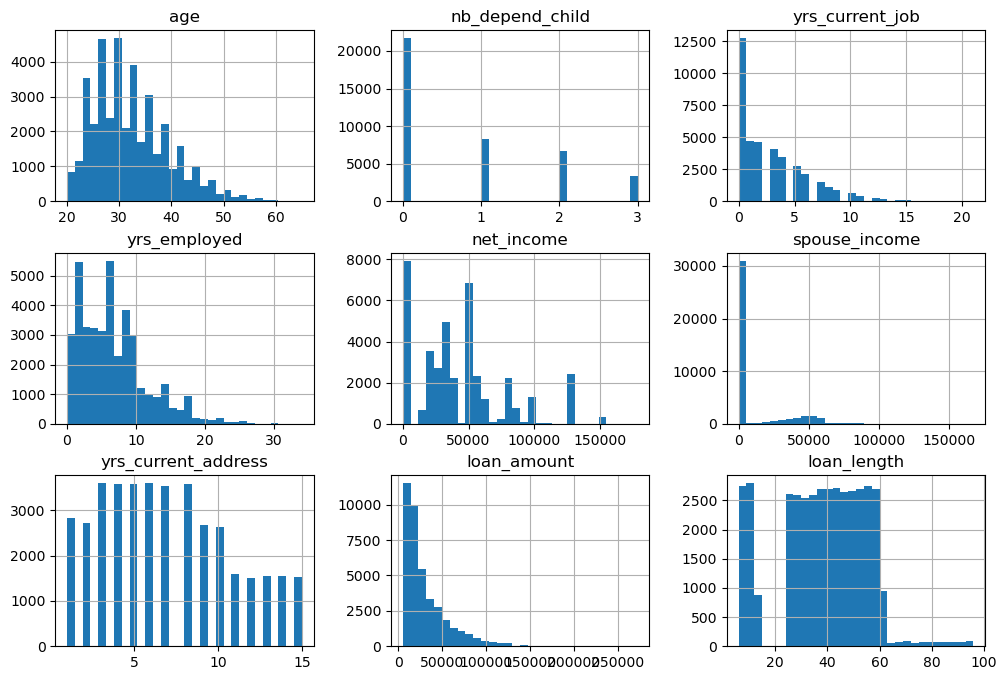

In [28]:
df[numeric_features].hist(figsize=(12, 8), bins=30)


# histogram with seperate target

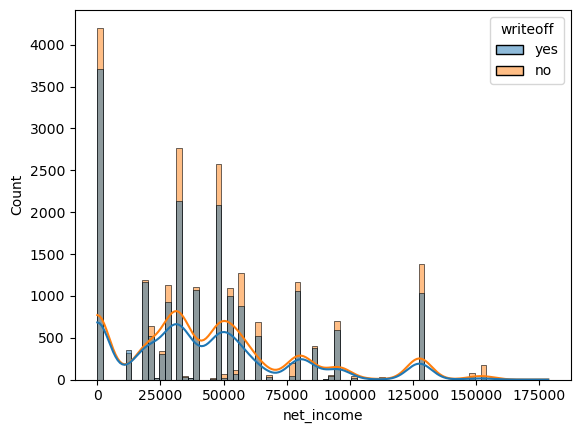

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='net_income', hue=TARGET_COL, kde=True)
plt.show()


# (Bar Chart)

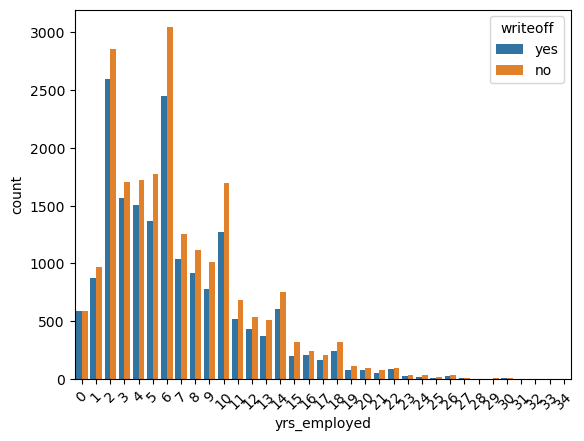

In [31]:
sns.countplot(data=df, x='yrs_employed', hue=TARGET_COL)
plt.xticks(rotation=45)
plt.show()


# Correlation

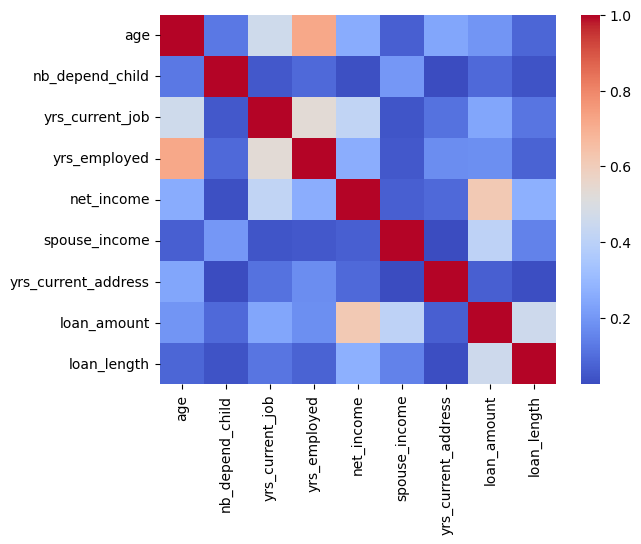

In [32]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()
